## DETE, TAFE Exit Survey Analysis
We're working with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

### Key Questions
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

### Key Columns (DETE)
* ID: An id used to identify the participant of the survey
* SeparationType: The reason why the person's employment ended
* Cease Date: The year or month the person's employment ended
* DETE Start Date: The year the person began employment with the DET

### Key Columns (TAFE)
* Record ID: An id used to identify the participant of the survey
* Reason for ceasing employment: The reason why the person's employment ended
* LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)

In [128]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)

In [129]:
dete_survey = pd.read_csv('dete_survey.csv')

In [130]:
tafe_survey = pd.read_csv('tafe_survey.csv')

In [131]:
dete_survey.shape

(822, 56)

In [132]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [133]:
dete_survey.head()

ID                    SeparationType Cease Date DETE Start Date  \
0   1             Ill Health Retirement    08/2012            1984   
1   2  Voluntary Early Retirement (VER)    08/2012      Not Stated   
2   3  Voluntary Early Retirement (VER)    05/2012            2011   
3   4         Resignation-Other reasons    05/2012            2005   
4   5                    Age Retirement    05/2012            1970   

  Role Start Date                                      Position  \
0            2004                                Public Servant   
1      Not Stated                                Public Servant   
2            2011                               Schools Officer   
3            2006                                       Teacher   
4            1989  Head of Curriculum/Head of Special Education   

  Classification              Region                      Business Unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-AO7      Central Office  Corporate Strategy and Peformance   
2            NaN      Central Office               Education Queensland   
3        Primary  Central Queensland                                NaN   
4            NaN          South East                                NaN   

     Employment Status  Career move to public sector  \
0  Permanent Full-time                          True   
1  Permanent Full-time                         False   
2  Permanent Full-time                         False   
3  Permanent Full-time                         False   
4  Permanent Full-time                         False   

   Career move to private sector  Interpersonal conflicts  \
0                          False                    False   
1                          False                    False   
2                          False                    False   
3                           True                    False   
4                          False                    False   

   Job dissatisfaction  Dissatisfaction with the department  \
0                 True                                False   
1                False                                False   
2                False                                False   
3                False                                False   
4                False                                False   

   Physical work environment  Lack of recognition  Lack of job security  \
0                      False                 True                 False   
1                      False                False                 False   
2                      False                False                 False   
3                      False                False                 False   
4                      False                False                 False   

   Work location  Employment conditions  Maternity/family  Relocation  \
0          False                  False             False       False   
1          False                  False             False       False   
2          False                  False             False       False   
3          False                  False             False       False   
4          False                  False             False       False   

   Study/Travel  Ill Health  Traumatic incident  Work life balance  Workload  \
0         False       False               False              False     False   
1         False       False               False              False     False   
2         False       False               False              False     False   
3         False       False               False              False     False   
4         False       False               False               True     False   

   None of the above Professional Development Opportunities for promotion  \
0               True                        A                           A   
1              False                        A                           A   
2               True                       

In [134]:
dete_survey.isnull().sum().sort_values(ascending=False)

Torres Strait                          819
South Sea                              815
Aboriginal                             806
Disability                             799
NESB                                   790
Business Unit                          696
Classification                         367
Opportunities for promotion             87
Career Aspirations                      76
Wellness programs                       56
Coach                                   55
Further PD                              54
Workplace issue                         34
Feedback                                30
Health & Safety                         29
Gender                                  24
Professional Development                14
Stress and pressure support             12
Skills                                  11
Age                                     11
Peer support                            10
My say                                  10
Performance of supervisor                9
Initiative 

In [135]:
tafe_survey.shape

(702, 72)

In [136]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [137]:
tafe_survey.isnull().sum().sort_values(ascending=False)

Main Factor. Which of these was the main factor for leaving?                                                                                                     589
InductionInfo. Topic:Did you undertake a Corporate Induction?                                                                                                    270
Contributing Factors. Ill Health                                                                                                                                 265
Contributing Factors. Maternity/Family                                                                                                                           265
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributing Factors. NONE                                                                                                                                       265
Contributi

In [138]:
tafe_survey.head()

Record ID                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2  6.341388e+17            Mount Isa Institute of TAFE   
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   

                   WorkArea  CESSATION YEAR Reason for ceasing employment  \
0  Non-Delivery (corporate)          2010.0              Contract Expired   
1  Non-Delivery (corporate)          2010.0                    Retirement   
2       Delivery (teaching)          2010.0                    Retirement   
3  Non-Delivery (corporate)          2010.0                   Resignation   
4       Delivery (teaching)          2010.0                   Resignation   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                  -   
2                                                  -   
3                                                  -   
4                                                  -   

  Contributing Factors. Career Move - Private Sector   \
0                                                NaN    
1                                                  -    
2                                                  -    
3                                                  -    
4                       Career Move - Private Sector    

  Contributing Factors. Career Move - Self-employment  \
0                                                NaN    
1                                                  -    
2                                                  -    
3                                                  -    
4                                                  -    

  Contributing Factors. Ill Health Contributing Factors. Maternity/Family  \
0                              NaN                                    NaN   
1                                -                                      -   
2                                -                                      -   
3                                -                                      -   
4                                -                                      -   

  Contributing Factors. Dissatisfaction  \
0                                   NaN   
1                                     -   
2                                     -   
3                                     -   
4                                     -   

  Contributing Factors. Job Dissatisfaction  \
0                                       NaN   
1                                         -   
2                                         -   
3                                         -   
4                                         -   

  Contributing Factors. Interpersonal Conflict Contributing Factors. Study  \
0                                          NaN                         NaN   
1                                            -                           -   
2                                            -                           -   
3                                            -                           -   
4                                            -                           -   

  Contributing Factors. Travel Contributing Factors. Other  \
0                          NaN                         NaN   
1                       Travel                           -   
2                            -                           -   
3                       Travel                           -   
4                            -                           -   

  Contributing Factors. NONE  \
0                        NaN   
1                          -   
2                       NONE   
3                          -   
4                          -   

  Main Factor. Which of these was the main factor for leaving?  \
0                                                NaN             

### DETE / TAFE Survey Summary:
Both datasets provide information on employee demographics, position, and tenure, as well as information on why an employee was dissatisfied with the job.  However, they have different formats.  (e.g. Many of the columns in TAFE Survey are formatted as questions with Y/N answers, whereas DETE survey has shorter column names with boolean values.)  

We have several columns (Torres Strait, South Sea, e.g.) in DETE with mostly missing values, and a fair number of  missign values in TAFE as well.

We also have many columns that may are not necessary to answer our questions.

** The DETE survey uses the string 'Not Stated' to indicate missing values

### Indicate missing values

--> Account for the face that The DETE survey uses the string 'Not Stated' to indicate missing values

In [139]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

### Drop columns that indicate duplicate information

In [140]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

In [141]:
dete_survey_updated.shape

(822, 35)

In [142]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

In [143]:
tafe_survey_updated.shape

(702, 23)

### Make column names more uniform

In [144]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')    

In [145]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [146]:
rename_col_mapping = {
   'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service' ,
}
tafe_survey_updated = tafe_survey_updated.rename(rename_col_mapping, axis=1)

In [147]:
dete_survey_updated.head()

id                    separationtype cease_date  dete_start_date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER)    05/2012           2011.0   
3   4         Resignation-Other reasons    05/2012           2005.0   
4   5                    Age Retirement    05/2012           1970.0   

   role_start_date                                      position  \
0           2004.0                                Public Servant   
1              NaN                                Public Servant   
2           2011.0                               Schools Officer   
3           2006.0                                       Teacher   
4           1989.0  Head of Curriculum/Head of Special Education   

  classification              region                      business_unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-AO7      Central Office  Corporate Strategy and Peformance   
2            NaN      Central Office               Education Queensland   
3        Primary  Central Queensland                                NaN   
4            NaN          South East                                NaN   

     employment_status  career_move_to_public_sector  \
0  Permanent Full-time                          True   
1  Permanent Full-time                         False   
2  Permanent Full-time                         False   
3  Permanent Full-time                         False   
4  Permanent Full-time                         False   

   career_move_to_private_sector  interpersonal_conflicts  \
0                          False                    False   
1                          False                    False   
2                          False                    False   
3                           True                    False   
4                          False                    False   

   job_dissatisfaction  dissatisfaction_with_the_department  \
0                 True                                False   
1                False                                False   
2                False                                False   
3                False                                False   
4                False                                False   

   physical_work_environment  lack_of_recognition  lack_of_job_security  \
0                      False                 True                 False   
1                      False                False                 False   
2                      False                False                 False   
3                      False                False                 False   
4                      False                False                 False   

   work_location  employment_conditions  maternity/family  relocation  \
0          False                  False             False       False   
1          False                  False             False       False   
2          False                  False             False       False   
3          False                  False             False       False   
4          False                  False             False       False   

   study/travel  ill_health  traumatic_incident  work_life_balance  workload  \
0         False       False               False              False     False   
1         False       False               False              False     False   
2         False       False               False              False     False   
3         False       False               False              False     False   
4         False       False               False               True     False   

   none_of_the_above  gender          age aboriginal torres_strait south_sea  \
0               True    Male        56-60        NaN           NaN       NaN   
1              False    Male        56-60        NaN           NaN       NaN   
2               True  

In [148]:
tafe_survey_updated.head()

id                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2  6.341388e+17            Mount Isa Institute of TAFE   
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   

                   WorkArea  cease_date    separationtype  \
0  Non-Delivery (corporate)      2010.0  Contract Expired   
1  Non-Delivery (corporate)      2010.0        Retirement   
2       Delivery (teaching)      2010.0        Retirement   
3  Non-Delivery (corporate)      2010.0       Resignation   
4       Delivery (teaching)      2010.0       Resignation   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                  -   
2                                                  -   
3                                                  -   
4                                                  -   

  Contributing Factors. Career Move - Private Sector   \
0                                                NaN    
1                                                  -    
2                                                  -    
3                                                  -    
4                       Career Move - Private Sector    

  Contributing Factors. Career Move - Self-employment  \
0                                                NaN    
1                                                  -    
2                                                  -    
3                                                  -    
4                                                  -    

  Contributing Factors. Ill Health Contributing Factors. Maternity/Family  \
0                              NaN                                    NaN   
1                                -                                      -   
2                                -                                      -   
3                                -                                      -   
4                                -                                      -   

  Contributing Factors. Dissatisfaction  \
0                                   NaN   
1                                     -   
2                                     -   
3                                     -   
4                                     -   

  Contributing Factors. Job Dissatisfaction  \
0                                       NaN   
1                                         -   
2                                         -   
3                                         -   
4                                         -   

  Contributing Factors. Interpersonal Conflict Contributing Factors. Study  \
0                                          NaN                         NaN   
1                                            -                           -   
2                                            -                           -   
3                                            -                           -   
4                                            -                           -   

  Contributing Factors. Travel Contributing Factors. Other  \
0                          NaN                         NaN   
1                       Travel                           -   
2                            -                           -   
3                       Travel                           -   
4                            -                           -   

  Contributing Factors. NONE  gender     age    employment_status  \
0                        NaN  Female  26  30  Temporary Full-time   
1                          -     NaN     NaN                  NaN   
2                       NONE     NaN     NaN                  NaN   
3                          -     NaN     NaN                  NaN   
4                          -    Male  41  45  Permanent Full-time   

            

### Only select rows where separation due to resignation
Remember that the question we are trying to answer is: 

Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

In [149]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [150]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation')] 

In [151]:
dete_resignations['separationtype'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [152]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [153]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'] 

In [154]:
tafe_resignations['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

### Check for validity of cease_date colums

In [155]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
09/2010      1
2010         1
07/2012      1
07/2006      1
Name: cease_date, dtype: int64

In [156]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract('(?P<Year>[1-2][0-9]{3})').astype('float')   

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [157]:
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

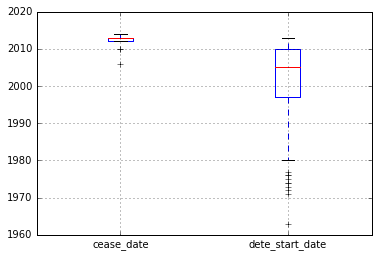

In [158]:
dete_resignations.boxplot(column=['cease_date', 'dete_start_date'])

In [159]:
dete_resignations['dete_start_date'].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [160]:
tafe_resignations['cease_date'].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

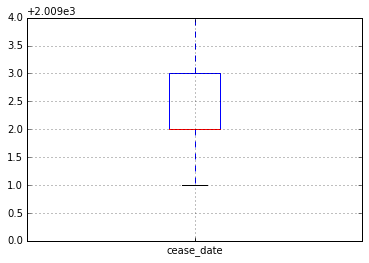

In [161]:
tafe_resignations.boxplot(column=['cease_date'])

### Conclusions:

The survey cease dates don't completely align.  Since we're not analyzing results by year, we can leave as is.

### Calculate length of service at the institute

In [162]:
# create new column designating length of time in service

dete_resignations['institute_service'] = (dete_resignations['cease_date'] - dete_resignations['dete_start_date'] )

# check the resuls
dete_resignations['institute_service'].head()


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

### Determine which rows represent resignation due to dissatisfaction with job

Approach:
* find all columns that indicate dissatisfaction with job
* add a new column that has boolean type to indicate if survey result list any type of disatisfaction

In [163]:
dete_resignations.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service'],
      dtype='object')

In [164]:
tafe_dissatisfied_cols = ['Contributing Factors. Dissatisfaction',
'Contributing Factors. Job Dissatisfaction', 'Contributing Factors. Interpersonal Conflict']

# Note: I decided to add 'Interpersonal Conflicts' to the list of reasons because I think
# workplace relationships play a role in work satisfaction

In [165]:
dete_dissatisfied_cols = [
'interpersonal_conflicts',
'job_dissatisfaction',
'dissatisfaction_with_the_department',
'physical_work_environment',
'lack_of_recognition',
'lack_of_job_security',
'work_location',
'employment_conditions',
'work_life_balance',
'workload']
# Note : 'I added interpersonal_conflicts to the list for the same reason as above

In [166]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [167]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [168]:
tafe_resignations['Contributing Factors. Interpersonal Conflict'].value_counts()

-                         308
Interpersonal Conflict     24
Name: Contributing Factors. Interpersonal Conflict, dtype: int64

In [169]:
def update_vals(val):
    if (pd.isnull(val)):
        return np.nan
    elif (val == '-'):
        return False
    else: 
        return True

tafe_resignations['dissatisfied'] = tafe_resignations[tafe_dissatisfied_cols].applymap(update_vals).any(axis=1, skipna=False)

tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up['dissatisfied'].value_counts()


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


False    235
True      97
Name: dissatisfied, dtype: int64

In [170]:
dete_resignations['workload'].value_counts()
# conclusion: DETE survey is already using boolean so we don't have to update the values
# as we did in the other dataframe

False    284
True      27
Name: workload, dtype: int64

In [171]:
dete_resignations['dissatisfied'] = dete_resignations[dete_dissatisfied_cols].any(axis=1, skipna=False)

dete_resignations_up = dete_resignations.copy()

dete_resignations['dissatisfied'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


False    157
True     154
Name: dissatisfied, dtype: int64

### Combine the DETE and TAFE datasets!
And drop any columns with < 500 non-null values

In [172]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [173]:
dete_resignations_up.head()

id                        separationtype  cease_date  dete_start_date  \
3    4             Resignation-Other reasons      2012.0           2005.0   
5    6             Resignation-Other reasons      2012.0           1994.0   
8    9             Resignation-Other reasons      2012.0           2009.0   
9   10            Resignation-Other employer      2012.0           1997.0   
11  12  Resignation-Move overseas/interstate      2012.0           2009.0   

    role_start_date          position classification                region  \
3            2006.0           Teacher        Primary    Central Queensland   
5            1997.0  Guidance Officer            NaN        Central Office   
8            2009.0           Teacher      Secondary      North Queensland   
9            2008.0      Teacher Aide            NaN                   NaN   
11           2009.0           Teacher      Secondary  Far North Queensland   

           business_unit    employment_status  career_move_to_public_sector  \
3                    NaN  Permanent Full-time                         False   
5   Education Queensland  Permanent Full-time                         False   
8                    NaN  Permanent Full-time                         False   
9                    NaN  Permanent Part-time                         False   
11                   NaN  Permanent Full-time                         False   

    career_move_to_private_sector  interpersonal_conflicts  \
3                            True                    False   
5                            True                    False   
8                            True                    False   
9                           False                     True   
11                          False                    False   

    job_dissatisfaction  dissatisfaction_with_the_department  \
3                 False                                False   
5                 False                                False   
8                 False                                False   
9                  True                                 True   
11                False                                False   

    physical_work_environment  lack_of_recognition  lack_of_job_security  \
3                       False                False                 False   
5                       False                False                 False   
8                       False                False                 False   
9                       False                False                 False   
11                      False                False                 False   

    work_location  employment_conditions  maternity/family  relocation  \
3           False                  False             False       False   
5           False                   True              True       False   
8           False                  False             False       False   
9           False                  False             False       False   
11          False                  False              True        True   

    study/travel  ill_health  traumatic_incident  work_life_balance  workload  \
3          False       False               False              False     False   
5          False       False               False              False     False   
8          False       False               False              False     False   
9          False       False               False              False     False   
11         False       False               False              False     False   

    none_of_the_above  gender    age aboriginal torres_strait south_sea  \
3               False  Female  36-40        NaN           NaN       NaN   
5               False  Female  41-45        NaN           NaN       NaN   
8               False  Female  31-35        NaN           NaN       NaN   
9               False  Female  46-50        NaN           NaN       NaN   
11              False    Male  31-35        NaN           NaN       NaN   


In [174]:
tafe_resignations_up.head()

id                              Institute  \
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   
5  6.341475e+17  Southern Queensland Institute of TAFE   
6  6.341520e+17         Barrier Reef Institute of TAFE   
7  6.341537e+17  Southern Queensland Institute of TAFE   

                   WorkArea  cease_date separationtype  \
3  Non-Delivery (corporate)      2010.0    Resignation   
4       Delivery (teaching)      2010.0    Resignation   
5       Delivery (teaching)      2010.0    Resignation   
6  Non-Delivery (corporate)      2010.0    Resignation   
7       Delivery (teaching)      2010.0    Resignation   

  Contributing Factors. Career Move - Public Sector   \
3                                                  -   
4                                                  -   
5                                                  -   
6                                                  -   
7                                                  -   

  Contributing Factors. Career Move - Private Sector   \
3                                                  -    
4                       Career Move - Private Sector    
5                                                  -    
6                       Career Move - Private Sector    
7                                                  -    

  Contributing Factors. Career Move - Self-employment  \
3                                                  -    
4                                                  -    
5                                                  -    
6                                                  -    
7                                                  -    

  Contributing Factors. Ill Health Contributing Factors. Maternity/Family  \
3                                -                                      -   
4                                -                                      -   
5                                -                                      -   
6                                -                       Maternity/Family   
7                                -                                      -   

  Contributing Factors. Dissatisfaction  \
3                                     -   
4                                     -   
5                                     -   
6                                     -   
7                                     -   

  Contributing Factors. Job Dissatisfaction  \
3                                         -   
4                                         -   
5                                         -   
6                                         -   
7                                         -   

  Contributing Factors. Interpersonal Conflict Contributing Factors. Study  \
3                                            -                           -   
4                                            -                           -   
5                                            -                           -   
6                                            -                           -   
7                                            -                           -   

  Contributing Factors. Travel Contributing Factors. Other  \
3                       Travel                           -   
4                            -                           -   
5                            -                       Other   
6                            -                       Other   
7                            -                       Other   

  Contributing Factors. NONE  gender            age    employment_status  \
3                          -     NaN            NaN                  NaN   
4                          -    Male         41  45  Permanent Full-time   
5                          -  Female    56 or older      Contract/casual   
6                          -    Male  20 or younger  Temporary Full-time   
7                          -    Male         46  50  Permanent Fu

In [175]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)
combined['institute'].value_counts()

TAFE    340
DETE    311
Name: institute, dtype: int64

In [176]:
combined_updated = combined.dropna(thresh=500, axis=1)

In [177]:
combined_updated.head()

age  cease_date dissatisfied    employment_status  gender    id  \
0  36-40      2012.0        False  Permanent Full-time  Female   4.0   
1  41-45      2012.0         True  Permanent Full-time  Female   6.0   
2  31-35      2012.0        False  Permanent Full-time  Female   9.0   
3  46-50      2012.0         True  Permanent Part-time  Female  10.0   
4  31-35      2012.0        False  Permanent Full-time    Male  12.0   

  institute institute_service          position  \
0      DETE                 7           Teacher   
1      DETE                18  Guidance Officer   
2      DETE                 3           Teacher   
3      DETE                15      Teacher Aide   
4      DETE                 3           Teacher   

                         separationtype  
0             Resignation-Other reasons  
1             Resignation-Other reasons  
2             Resignation-Other reasons  
3            Resignation-Other employer  
4  Resignation-Move overseas/interstate

### Clean up the institute_service column

We willl categorize length of service into these buckets:
* New: Less than 3 years in the workplace
* Experienced: 3-6 years in the workplace
* Established: 7-10 years in the workplace
* Veteran: 11 or more years in the workplace

Based on [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage) which purports that  career stage is a better preidctor of employee needs than is age

In [178]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype('str')

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [179]:
combined_updated['institute_service'].value_counts()

nan                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
22.0                   6
14.0                   6
10.0                   6
12.0                   6
17.0                   6
16.0                   5
18.0                   5
11.0                   4
24.0                   4
23.0                   4
19.0                   3
39.0                   3
32.0                   3
21.0                   3
25.0                   2
26.0                   2
30.0                   2
28.0                   2
36.0                   2


In [182]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)').astype('float')

combined_updated['institute_service'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

In [181]:
combined_updated['institute_service_up'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [183]:
# Convert years of service to categories
def transform_service(val):
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(transform_service)

# Quick check of the update
combined_updated['service_cat'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

"Now, let's finally do our first piece of analysis! We'll help you fill in missing values in the dissatisfied column and then aggregate the data to get you started, but note that we still have additional missing values left to deal with. This is meant to be an initial introduction to the analysis, not the final analysis."

In [188]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    400
True     251
Name: dissatisfied, dtype: int64

In [187]:
# Replace missing values with the most frequent value, False
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


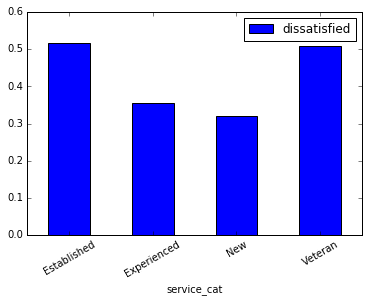

In [199]:
# Calculate the percentage of employees who resigned due to dissatisfaction in each category
dis_pct = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

# Plot the results
dis_pct.plot(kind='bar', rot=30)

We can (tentatively) conclude that employees with > 7 years in the workplace are more likely to resign due to dissatisfaction.

**However**, we still need to deal with the missing data.

In [195]:
combined_updated.isnull().sum()

age                     55
cease_date              16
dissatisfied             0
employment_status       54
gender                  59
id                       0
institute                0
institute_service       88
position                53
separationtype           0
institute_service_up    88
service_cat             88
dtype: int64

In [198]:
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

### Next steps:

Our work here is far from done! We recommend that you continue with the following steps:

* Decide how to handle the rest of the missing values. Then, aggregate the data according to the service_cat column again. How many people in each career stage resigned due to some kind of dissatisfaction?
* Clean the age column. How many people in each age group resgined due to some kind of dissatisfaction?
* Instead of analyzing the survey results together, analyze each survey separately. Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?
* Format your project using Dataquest's project style guide.